In [ ]:
import numpy as np
from collections import defaultdict

# Constants
t_unit = 10  # [ns] per time unit (time for the entire event)
event_length = 511  # number of data words in an event

# Dictionary to accumulate the total time for each threshold
time_per_threshold = defaultdict(float)
event_count_per_threshold = defaultdict(int)

class Scintillator:
    def __init__(self, id, x, y, phys_x, phys_y, t):
        self.id = id
        self.fired = False  # Tracks whether the scintillator has fired in the current event
        self.firing_count = defaultdict(int)  # Stores the count of firings by threshold index
        self.x = x
        self.y = y
        self.phys_x = phys_x
        self.phys_y = phys_y
        self.t = t

    def reset(self):
        """Resets the fired status for a new event."""
        self.fired = False

    def update_firing(self, threshold_index):
        """Updates the firing count if it has not fired in the current event."""
        if not self.fired:
            self.firing_count[threshold_index] += 1
            self.fired = True  # Mark it as fired for this event

    def __str__(self):
        return f"Scintillator {self.id}: x = {self.x}, y = {self.y}, phys_x = {self.phys_x} cm, phys_y = {self.phys_y} cm"

Scintillator_list = []
t=0

for i in range(13):
    id = i + 1 #so they run from 1 to 25
    x = i % 5 #so they run from 0 to 4
    if i == 0:
        y = 0
    else:
        y = i // 5 #so they run from 0 to 4
    phys_x = x*5 + 2.5
    phys_y = y*5 + 2.5
    Scintillator_list.append(Scintillator(id, x, y, phys_x, phys_y, t))
    print(Scintillator_list[i])

for i in range (14, 26):
    id = i #so they run from 1 to 25
    x = (i-1) % 5 #so they run from 0 to 4
    y = (i-1) // 5 #so they run from 0 to 4
    phys_x = x*5 + 2.5
    phys_y = y*5 + 2.5
    Scintillator_list.append(Scintillator(id, x, y, phys_x, phys_y, t))
    print(Scintillator_list[i-1])


Scintillator 1: x = 0, y = 0, phys_x = 2.5 cm, phys_y = 2.5 cm
Scintillator 2: x = 1, y = 0, phys_x = 7.5 cm, phys_y = 2.5 cm
Scintillator 3: x = 2, y = 0, phys_x = 12.5 cm, phys_y = 2.5 cm
Scintillator 4: x = 3, y = 0, phys_x = 17.5 cm, phys_y = 2.5 cm
Scintillator 5: x = 4, y = 0, phys_x = 22.5 cm, phys_y = 2.5 cm
Scintillator 6: x = 0, y = 1, phys_x = 2.5 cm, phys_y = 7.5 cm
Scintillator 7: x = 1, y = 1, phys_x = 7.5 cm, phys_y = 7.5 cm
Scintillator 8: x = 2, y = 1, phys_x = 12.5 cm, phys_y = 7.5 cm
Scintillator 9: x = 3, y = 1, phys_x = 17.5 cm, phys_y = 7.5 cm
Scintillator 10: x = 4, y = 1, phys_x = 22.5 cm, phys_y = 7.5 cm
Scintillator 11: x = 0, y = 2, phys_x = 2.5 cm, phys_y = 12.5 cm
Scintillator 12: x = 1, y = 2, phys_x = 7.5 cm, phys_y = 12.5 cm
Scintillator 13: x = 2, y = 2, phys_x = 12.5 cm, phys_y = 12.5 cm
Scintillator 14: x = 3, y = 2, phys_x = 17.5 cm, phys_y = 12.5 cm
Scintillator 15: x = 4, y = 2, phys_x = 22.5 cm, phys_y = 12.5 cm
Scintillator 16: x = 0, y = 3, phys

In [ ]:
import struct

# Class representing a scintillator, including its ID, grid position (x, y),
# physical position (phys_x, phys_y), and the associated timestamp.
class Scintillator:
    def __init__(self, id, x, y, phys_x, phys_y, t):
        self.id = id
        self.x = x
        self.y = y
        self.phys_x = phys_x
        self.phys_y = phys_y
        self.time = t

    # String representation for better readability when printing scintillators
    def __repr__(self):
        return f"Scintillator(id={self.id}, x={self.x}, y={self.y}, phys_x={self.phys_x}, phys_y={self.phys_y}, time={self.time})"

# Function to read the binary data from a file
def read_binary_file(file_path):
    # Open the file in binary mode and read its contents
    with open(file_path, "rb") as binary_file:
        binary_data = binary_file.read()
    return binary_data

# Function to decode 32-bit words from the binary data
def decode_32bit_words(binary_data):
    # Hardcoded assumption of the number of 32-bit words (to be dynamically determined based on your data)
    num_words = 51600000  # Adjust if necessary

    # For testing purposes, printing the number of events
    print("events in this file: " + (len(binary_data) // 4 // 516))

    # Define the end-of-event marker (used in footers)
    end_header_hex = 0xFF000000  # Not currently in use
    decoded_words = []

    i = 0  # Index to iterate over binary data
    while i < num_words:
        # Read and skip the header words (first 4 words per event)
        header_words = [int.from_bytes(binary_data[j * 4:(j + 1) * 4], byteorder='little') for j in range(i, i + 4)]
        i += 4

        # Read the next 511 words (data words per event)
        for j in range(511):
            word_int = int.from_bytes(binary_data[i * 4:(i + 1) * 4], byteorder='little')
            decoded_words.append(word_int)  # Store decoded word in list
            i += 1

        # Read the footer word (last word per event)
        footer_word = int.from_bytes(binary_data[i * 4:(i + 1) * 4], byteorder='little')
        # If needed, uncomment and check for event end marker match here
        # if footer_word == end_header_hex:
        #     print("End of event detected.")
        # else:
        #     print(f"Footer word mismatch: {hex(footer_word)}")

        i += 1  # Move index forward

    return decoded_words

# Function to decode a single 32-bit word into active scintillators at a given time
def decode_word(word_int, time):
    active_scints = []

    # Process bits 0-12 to find which scintillators (IDs 1-13) are active
    for i in range(13):
        scint_id = i + 1  # Scintillator ID starts from 1
        if word_int & (1 << i):  # If the bit is set, the scintillator is active
            x = i % 5  # Grid x-coordinate (mod 5 to wrap in a 5x5 grid)
            y = 0 if i == 0 else i // 5  # Grid y-coordinate (rows)
            phys_x = x * 5 + 2.5  # Physical x-coordinate
            phys_y = y * 5 + 2.5  # Physical y-coordinate
            active_scints.append(Scintillator(scint_id, x, y, phys_x, phys_y, time))

    # Process bits 15-25 (IDs 15-25), skipping bit 14 (unused)
    for i in range(14, 26):
        scint_id = i
        if word_int & (1 << i):  # If the bit is set, the scintillator is active
            x = (scint_id - 1) % 5  # Grid x-coordinate
            y = (scint_id - 1) // 5  # Grid y-coordinate
            phys_x = x * 5 + 2.5  # Physical x-coordinate
            phys_y = y * 5 + 2.5  # Physical y-coordinate
            active_scints.append(Scintillator(scint_id, x, y, phys_x, phys_y, time))

    return active_scints

# Main function to process the binary file and decode the scintillators for each event
def process_file(filename):
    # Read the binary data from the file
    binary_data = read_binary_file(filename)

    # Decode the binary data into 32-bit words
    decoded_words = decode_32bit_words(binary_data)

    # List to hold decoded scintillators for each word
    decoded_words_list = []

    # Iterate through the decoded words and decode scintillator activity for each
    for idx, word_int in enumerate(decoded_words):
        time = ((idx + 1) % 511) * 10  # Calculate time (reset every 511 words)
        decoded_word = decode_word(word_int, time)  # Decode scintillator activity
        decoded_words_list.append(decoded_word)  # Store decoded result

    return decoded_words_list

# Uncomment below to print the results (each event's active scintillators)
# for scints in decoded_scints:
#     print(scints)



574373


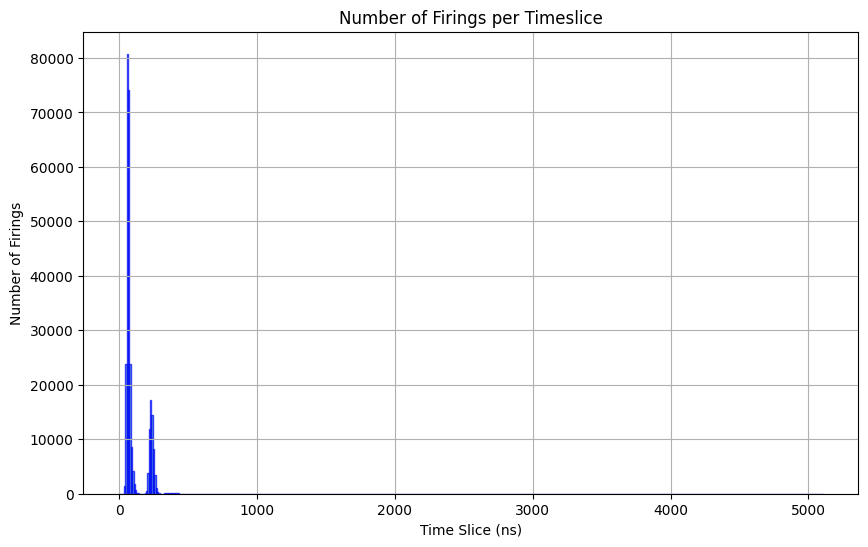

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to plot the number of firings per timeslice using the Scintillator `time` attribute
def plot_firing_counts_per_timeslice_using_time(decoded_scints):
    # Initialize a defaultdict to accumulate the number of firings for each timeslice.
    # The key will be the time (in ns), and the value will be the count of firings at that time.
    firing_counts = defaultdict(int)

    # Loop through the decoded scintillators for each event
    for event in decoded_scints:
        # Each event contains a list of Scintillator objects
        for scint in event:
            # Increment the firing count for the corresponding time slice (scintillator's `time` attribute)
            firing_counts[scint.time] += 1

    # Convert the defaultdict into two lists: one for timeslices (sorted) and one for firing counts
    timeslices = sorted(firing_counts.keys())  # Get sorted timeslices
    firings_per_timeslice = [firing_counts[t] for t in timeslices]  # List of firings for each timeslice

    # Plot the number of firings as a histogram (bar chart) per timeslice
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    plt.bar(timeslices, firings_per_timeslice, width=10, edgecolor='blue', alpha=0.7)  # Bar plot

    # Add labels and title to the plot
    plt.xlabel('Time Slice (ns)')  # Label for the x-axis
    plt.ylabel('Number of Firings')  # Label for the y-axis
    plt.title('Number of Firings per Timeslice')  # Title of the plot
    plt.grid(True)  # Add gridlines to the plot
    plt.show()  # Display the plot

# Example usage: Process a specific file and plot the results
for i in [146]:  # Change this based on the specific file numbers you want to process
    file_path = "/content/drive/MyDrive/Cambridge/data/run." + str(i) + ".dat"  # Construct the file path
    decoded_scints = process_file(file_path)  # Process the file to decode scintillators
    plot_firing_counts_per_timeslice_using_time(decoded_scints)  # Plot the firings per timeslice



131733


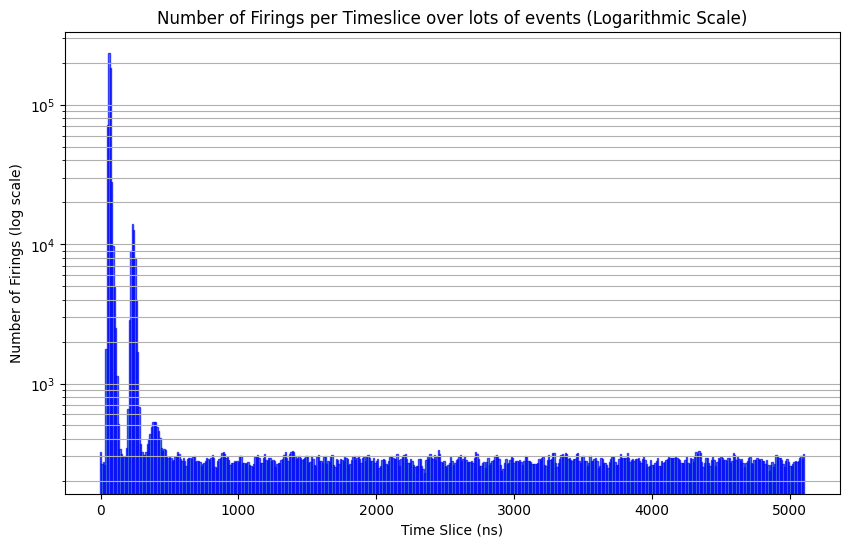

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to plot the number of firings per timeslice using the Scintillator `time` attribute
def plot_firing_counts_per_timeslice_using_time(decoded_scints):
    # Use defaultdict to accumulate the number of firings for each timeslice
    # Key: time (in nanoseconds), Value: count of firings at that time
    firing_counts = defaultdict(int)

    # Loop through the decoded scintillators for each event
    for event in decoded_scints:
        for scint in event:  # Each event is a list of Scintillators
            # Increment the firing count for the corresponding time slice (scintillator's `time` attribute)
            firing_counts[scint.time] += 1

    # Convert the defaultdict into two lists: timeslices (sorted) and corresponding firing counts
    timeslices = sorted(firing_counts.keys())  # Sorted list of time slices
    firings_per_timeslice = [firing_counts[t] for t in timeslices]  # List of firings for each time slice

    # Plot the histogram of firings per timeslice
    plt.figure(figsize=(10, 6))  # Create figure with specified dimensions

    # Bar plot of timeslices vs. firings, with logarithmic y-scale to capture a wide range of firing counts
    plt.bar(timeslices, firings_per_timeslice, width=10, edgecolor='blue', alpha=0.7)

    # Set y-axis to logarithmic scale for better visualization of a wide range of values
    plt.yscale('log')

    # Label the axes
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Number of Firings per Timeslice over lots of events (Logarithmic Scale)')

    # Add a grid for both major and minor ticks on the y-axis for easier reading of log-scale values
    plt.grid(True, which='both', axis='y')  # Grid lines on both major and minor ticks

    # Display the plot
    plt.show()

# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.151.dat"  # Path to the data file
decoded_scints = process_file(file_path)  # Process the file to decode scintillators
plot_firing_counts_per_timeslice_using_time(decoded_scints)  # Plot the results



574373


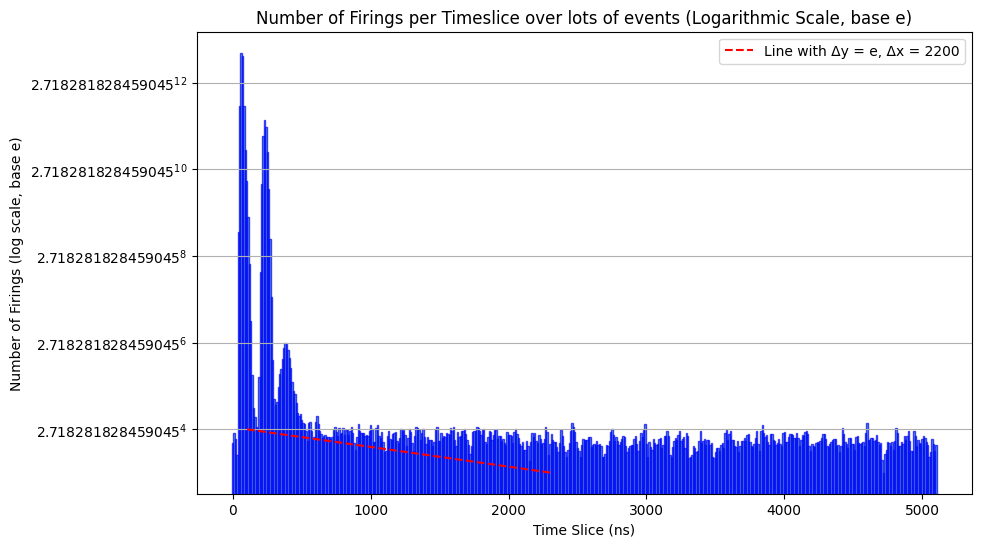

In [ ]:
#same plot as the previous, but with the log e.
#I want to plot a long line that doesn't necessary fit the plot, whose delta_y = e (a factor 1 in the log(e) scale)
#and delta_x = 2200, and then shift it

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ... (Your existing code for processing the file and decoding scintillators) ...

# Function to plot the number of firings per timeslice using the Scintillator `time` attribute
def plot_firing_counts_per_timeslice_using_time(decoded_scints):
    # Use defaultdict to accumulate the number of firings for each timeslice
    firing_counts = defaultdict(int)

    # Loop through the decoded scintillators
    for event in decoded_scints:
        for scint in event:  # Each event is a list of Scintillators
            firing_counts[scint.time] += 1  # Increment the count for the corresponding timeslice

    # Convert the defaultdict to a list sorted by timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    # Plot the histogram of firings per timeslice
    plt.figure(figsize=(10, 6))
    plt.bar(timeslices, firings_per_timeslice, width=10, edgecolor='blue', alpha=0.7)

    # Set y-axis to logarithmic scale with base e
    plt.yscale('log', base=np.e)

    # Add a line with delta_y = e and delta_x = 2200
    x_start = 2300  # Starting x-coordinate of the line
    y_start = np.e**3  # Starting y-coordinate of the line (e^0 = 1)
    x_end = x_start - 2200
    y_end = y_start * np.e  # End y-coordinate (e^1 = e)
    plt.plot([x_start, x_end], [y_start, y_end], color='red', linestyle='--', label='Line with Δy = e, Δx = 2200')

    # You can shift the line by changing x_start and y_start
    # For example, to shift it right by 1000 ns:
    # x_start = 1000
    # y_start = 1  # Keep the same y_start for the same relative position on the log scale

    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale, base e)')
    plt.title('Number of Firings per Timeslice over lots of events (Logarithmic Scale, base e)')
    plt.grid(True, which='both', axis='y')  # Grid on both major and minor ticks
    plt.legend()
    plt.show()


# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.146.dat"
decoded_scints = process_file(file_path)  # Process file and get the list of Scintillators
plot_firing_counts_per_timeslice_using_time(decoded_scints)


574373
265319


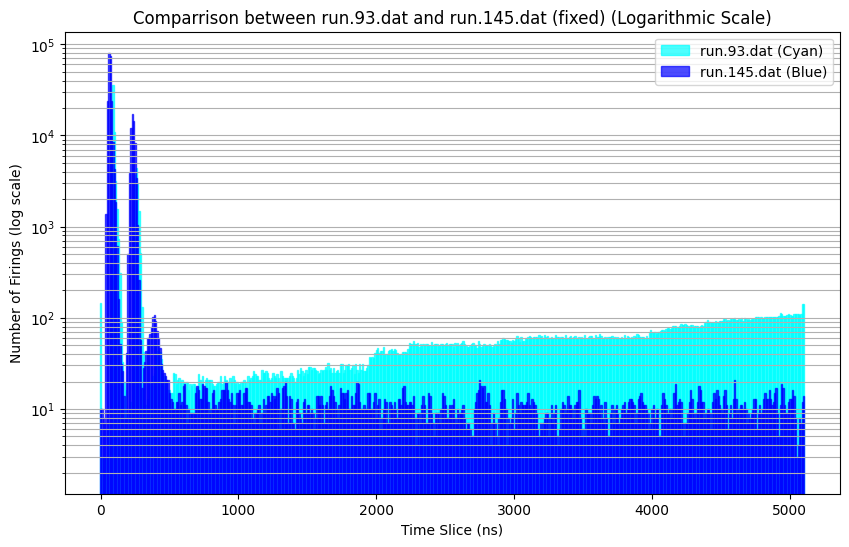

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Funzione per ottenere il conteggio dei firing per ogni timeslice
def get_firing_counts_per_timeslice(decoded_scints):
    firing_counts = defaultdict(int)

    for event in decoded_scints:
        for scint in event:  # Ogni evento è una lista di scintillatori
            firing_counts[scint.time] += 1  # Incrementa il conteggio per il timeslice corrispondente

    # Converte i conteggi in una lista ordinata per timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    return timeslices, firings_per_timeslice

# Funzione per plottare i due dataset sovrapposti
def plot_firing_counts_comparison(file_path1, file_path2):
    # Processa i file
    decoded_scints1 = process_file(file_path1)  # Dati del primo file (run.145.dat)
    decoded_scints2 = process_file(file_path2)  # Dati del secondo file (run.93.dat)

    # Ottieni i dati per entrambi i file
    timeslices1, firings_per_timeslice1 = get_firing_counts_per_timeslice(decoded_scints1)
    timeslices2, firings_per_timeslice2 = get_firing_counts_per_timeslice(decoded_scints2)

    # Plot del primo file (run.93.dat) in azzurro, in secondo piano
    plt.figure(figsize=(10, 6))
    plt.bar(timeslices2, firings_per_timeslice2, width=10, color='cyan', edgecolor='cyan', alpha=0.7, label='run.93.dat (Cyan)')

    # Plot del secondo file (run.145.dat) in blu, in primo piano
    plt.bar(timeslices1, firings_per_timeslice1, width=10, color='blue', edgecolor='blue', alpha=0.7, label='run.145.dat (Blue)')

    # Setta l'asse y in scala logaritmica
    plt.yscale('log')

    # Aggiungi etichette e titolo
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Comparrison between run.93.dat and run.145.dat (fixed) (Logarithmic Scale)')
    plt.legend()
    plt.grid(True, which='both', axis='y')  # Grid su entrambe le scale maggiori e minori
    plt.show()

# Esempio di utilizzo
file_path1 = "/content/drive/MyDrive/Cambridge/data/run.146.dat"
file_path2 = "/content/drive/MyDrive/Cambridge/data/run.93.dat"
plot_firing_counts_comparison(file_path1, file_path2)


385503
574373


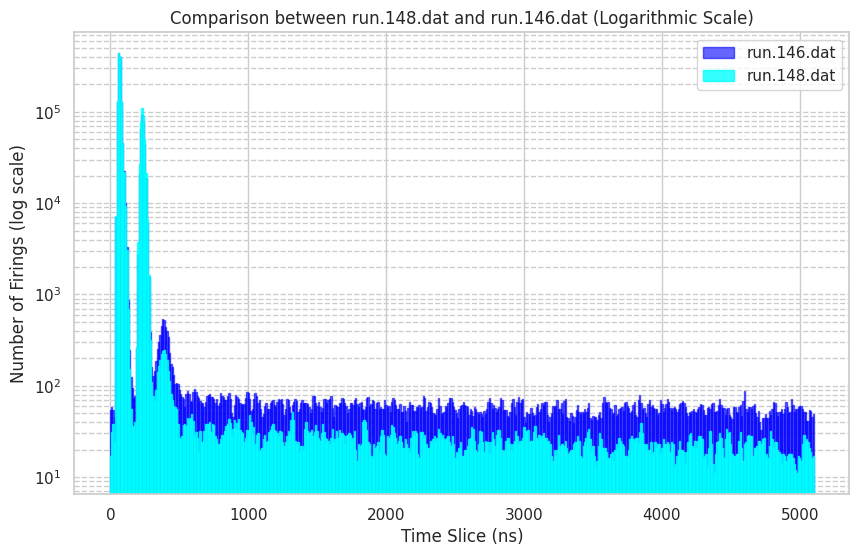

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Function to get firing counts per timeslice
def get_firing_counts_per_timeslice(decoded_scints):
    firing_counts = defaultdict(int)

    for event in decoded_scints:
        for scint in event:  # Each event is a list of scintillators
            firing_counts[scint.time] += 1  # Increment count for the corresponding timeslice

    # Convert the counts to a sorted list by timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    return timeslices, firings_per_timeslice

# Function to plot two datasets with Seaborn and distinguish colors properly
def plot_firing_counts_comparison_seaborn(file_path1, file_path2):
    # Process the files
    decoded_scints1 = process_file(file_path1)  # Data from run.145.dat
    decoded_scints2 = process_file(file_path2)  # Data from run.93.dat

    # Get data for both files
    timeslices1, firings_per_timeslice1 = get_firing_counts_per_timeslice(decoded_scints1)
    timeslices2, firings_per_timeslice2 = get_firing_counts_per_timeslice(decoded_scints2)

    # Initialize Seaborn for better aesthetics
    sns.set(style="whitegrid")

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the first file (run.93.dat) in cyan
    plt.bar(timeslices2, firings_per_timeslice2, width=10, color='blue', edgecolor='blue', label='run.146.dat', alpha=0.6)

    # Plot the second file (run.145.dat) in blue on top
    plt.bar(timeslices1, firings_per_timeslice1, width=10, color='cyan', edgecolor='cyan', label='run.148.dat', alpha=0.8)

    # Set the y-axis to a logarithmic scale
    plt.yscale('log')

    # Add labels, title, and legend
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Comparison between run.148.dat and run.146.dat (Logarithmic Scale)')
    plt.legend()

    # Add gridlines for better readability
    plt.grid(True, which='both', axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage
file_path1 = "/content/drive/MyDrive/Cambridge/data/run.148.dat"
file_path2 = "/content/drive/MyDrive/Cambridge/data/run.146.dat"
plot_firing_counts_comparison_seaborn(file_path1, file_path2)



385503
574373


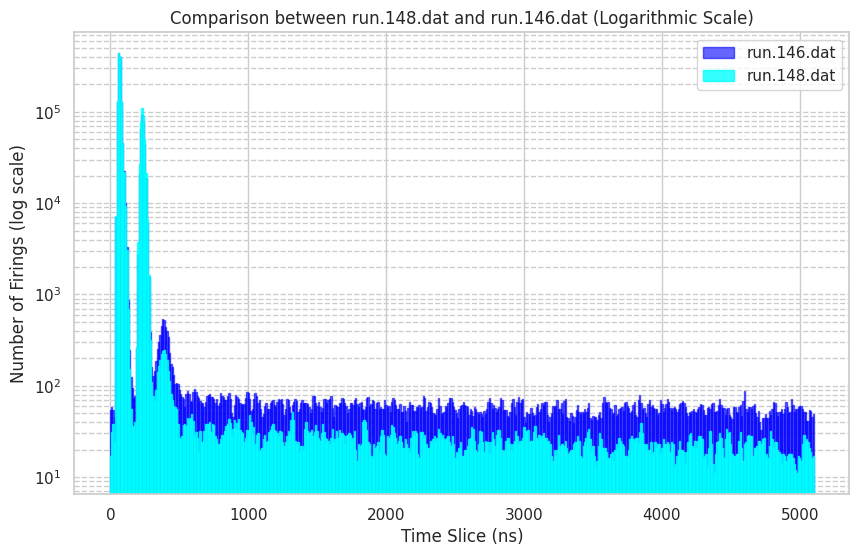

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Function to get firing counts per timeslice, grouped by 5 bins
def get_firing_counts_per_timeslice_grouped(decoded_scints):
    firing_counts = defaultdict(int)

    for event in decoded_scints:
        for scint in event:  # Each event is a list of scintillators
            # Accorpare i time slice in gruppi di 5 (es. 0-4, 5-9, ...)
            grouped_time = (scint.time // 5) * 5
            firing_counts[grouped_time] += 1  # Increment count for the grouped timeslice

    # Convert the counts to a sorted list by grouped timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    return timeslices, firings_per_timeslice

# Function to plot two datasets with Seaborn and distinguish colors properly
def plot_firing_counts_comparison_seaborn(file_path1, file_path2):
    # Process the files
    decoded_scints1 = process_file(file_path1)  # Data from run.145.dat
    decoded_scints2 = process_file(file_path2)  # Data from run.93.dat

    # Get data for both files, grouped by 5 bins
    timeslices1, firings_per_timeslice1 = get_firing_counts_per_timeslice_grouped(decoded_scints1)
    timeslices2, firings_per_timeslice2 = get_firing_counts_per_timeslice_grouped(decoded_scints2)

    # Initialize Seaborn for better aesthetics
    sns.set(style="whitegrid")

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the first file (run.93.dat) in blue
    plt.bar(timeslices2, firings_per_timeslice2, width=10, color='blue', edgecolor='blue', label='run.146.dat', alpha=0.6)

    # Plot the second file (run.145.dat) in cyan on top
    plt.bar(timeslices1, firings_per_timeslice1, width=10, color='cyan', edgecolor='cyan', label='run.148.dat', alpha=0.8)

    # Set the y-axis to a logarithmic scale
    plt.yscale('log')

    # Add labels, title, and legend
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Comparison between run.148.dat and run.146.dat (Logarithmic Scale)')
    plt.legend()

    # Add gridlines for better readability
    plt.grid(True, which='both', axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage
file_path1 = "/content/drive/MyDrive/Cambridge/data/run.148.dat"
file_path2 = "/content/drive/MyDrive/Cambridge/data/run.146.dat"
plot_firing_counts_comparison_seaborn(file_path1, file_path2)



150334
574373


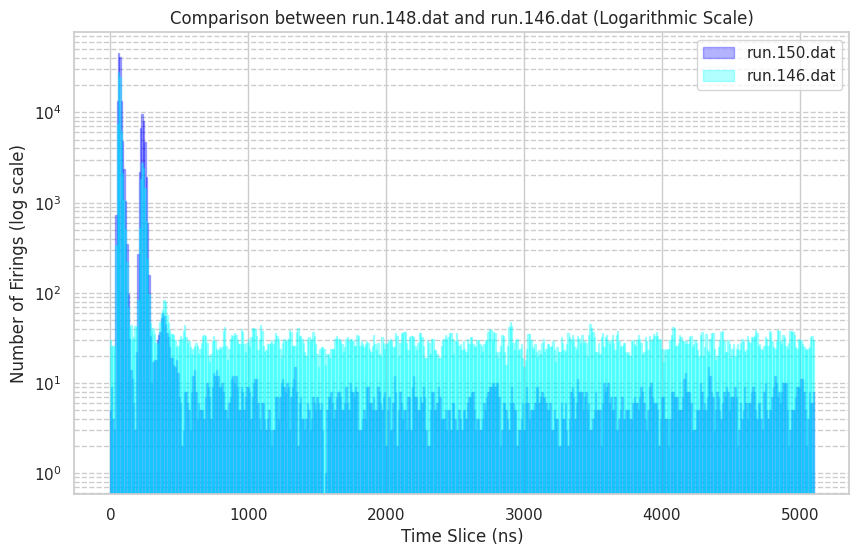

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Function to get firing counts per timeslice, grouped by 5 bins
def get_firing_counts_per_timeslice_grouped(decoded_scints):
    firing_counts = defaultdict(int)

    for event in decoded_scints:
        for scint in event:  # Each event is a list of scintillators
            # Accorpare i time slice in gruppi di 5 (es. 0-4, 5-9, ...)
            grouped_time = (scint.time // 5) * 5
            firing_counts[grouped_time] += 1  # Increment count for the grouped timeslice

    # Convert the counts to a sorted list by grouped timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    return timeslices, firings_per_timeslice

# Function to plot two datasets with Seaborn and distinguish colors properly
def plot_firing_counts_comparison_seaborn(file_path1, file_path2):
    # Process the files
    decoded_scints1 = process_file(file_path1)  # Data from run.145.dat
    decoded_scints2 = process_file(file_path2)  # Data from run.93.dat

    # Get data for both files, grouped by 5 bins
    timeslices1, firings_per_timeslice1 = get_firing_counts_per_timeslice_grouped(decoded_scints1)
    timeslices2, firings_per_timeslice2 = get_firing_counts_per_timeslice_grouped(decoded_scints2)

    # Initialize Seaborn for better aesthetics
    sns.set(style="whitegrid")

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the first file (run.93.dat) in blue
    plt.bar(timeslices2, firings_per_timeslice2, width=10, color='blue', edgecolor='blue', label='run.150.dat', alpha=0.3)

    # Plot the second file (run.145.dat) in cyan on top
    plt.bar(timeslices1, firings_per_timeslice1, width=10, color='cyan', edgecolor='cyan', label='run.146.dat', alpha=0.3)

    # Set the y-axis to a logarithmic scale
    plt.yscale('log')

    # Add labels, title, and legend
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Comparison between run.148.dat and run.146.dat (Logarithmic Scale)')
    plt.legend()

    # Add gridlines for better readability
    plt.grid(True, which='both', axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage
file_path1 = "/content/drive/MyDrive/Cambridge/data/run.150.dat"
file_path2 = "/content/drive/MyDrive/Cambridge/data/run.146.dat"
plot_firing_counts_comparison_seaborn(file_path1, file_path2)


385503
131733


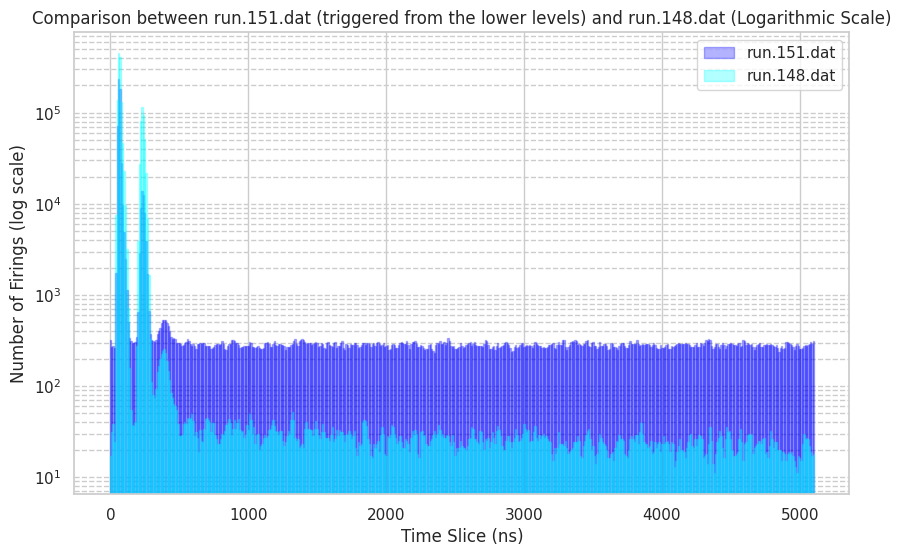

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# Function to get firing counts per timeslice, grouped by 5 bins
def get_firing_counts_per_timeslice_grouped(decoded_scints):
    firing_counts = defaultdict(int)

    for event in decoded_scints:
        for scint in event:  # Each event is a list of scintillators
            # timeslices in group of 5 (es. 0-4, 5-9, ...)
            grouped_time = (scint.time // 5) * 5
            firing_counts[grouped_time] += 1  # Increment count for the grouped timeslice

    # Convert the counts to a sorted list by grouped timeslice
    timeslices = sorted(firing_counts.keys())
    firings_per_timeslice = [firing_counts[t] for t in timeslices]

    return timeslices, firings_per_timeslice

# Function to plot two datasets with Seaborn and distinguish colors properly
def plot_firing_counts_comparison_seaborn(file_path1, file_path2):
    # Process the files
    decoded_scints1 = process_file(file_path1)  # Data from arbitrary run 1
    decoded_scints2 = process_file(file_path2)  # Data from arbitrary run 2

    # Get data for both files, grouped by 5 bins
    timeslices1, firings_per_timeslice1 = get_firing_counts_per_timeslice_grouped(decoded_scints1)
    timeslices2, firings_per_timeslice2 = get_firing_counts_per_timeslice_grouped(decoded_scints2)

    # Initialize Seaborn for better aesthetics
    sns.set(style="whitegrid")

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot the first file in blue
    plt.bar(timeslices2, firings_per_timeslice2, width=10, color='blue', edgecolor='blue', label='run.151.dat', alpha=0.3)

    # Plot the second file in cyan
    plt.bar(timeslices1, firings_per_timeslice1, width=10, color='cyan', edgecolor='cyan', label='run.148.dat', alpha=0.3)

    # Set the y-axis to a logarithmic scale
    plt.yscale('log')

    # Add labels, title, and legend
    plt.xlabel('Time Slice (ns)')
    plt.ylabel('Number of Firings (log scale)')
    plt.title('Comparison between run.151.dat (triggered from the lower levels) and run.148.dat (Logarithmic Scale)')
    plt.legend()

    # Add gridlines for better readability
    plt.grid(True, which='both', axis='y', linestyle='--')

    # Show the plot
    plt.show()

# Example usage
file_path1 = "/content/drive/MyDrive/Cambridge/data/run.148.dat"
file_path2 = "/content/drive/MyDrive/Cambridge/data/run.151.dat"
plot_firing_counts_comparison_seaborn(file_path1, file_path2)


131733


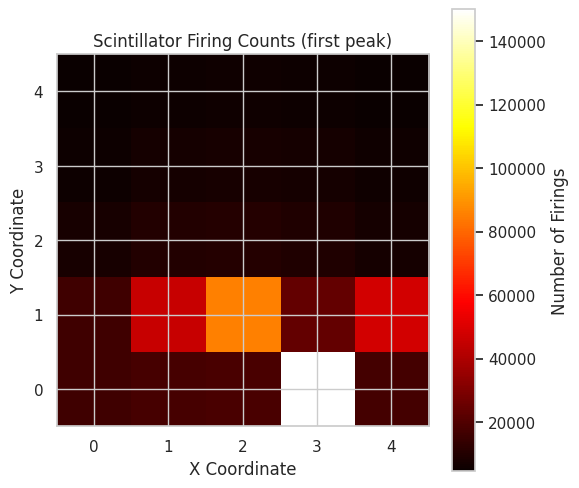

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to count the firings of each scintillator in the time window from 0 to 140 ns
def count_firings_per_scintillator(decoded_scints):
    # Initialize a defaultdict to accumulate the firing counts for each scintillator
    # The key will be a tuple representing the (x, y) coordinates of the scintillator
    scintillator_firing_counts = defaultdict(int)

    # Loop through all the events in decoded scintillators
    for event in decoded_scints:
        # Loop through each scintillator in the event
        for scint in event:
            # Only count firings that occurred within the time window 0 to 140 ns
            if 0 <= scint.time <= 140:
                # Increment the count for the scintillator at position (x, y)
                scintillator_firing_counts[(scint.x, scint.y)] += 1

    # Return the dictionary that contains the count of firings for each scintillator
    return scintillator_firing_counts

# Function to plot a 2D array (heatmap) of scintillator firing counts
def plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5)):
    # Create a 2D grid (initially filled with zeros) to represent the scintillator array
    # The size of the grid corresponds to the specified grid_size, typically 5x5
    firing_grid = np.zeros(grid_size)

    # Populate the grid with the number of firings for each scintillator based on their (x, y) coordinates
    for (x, y), count in scintillator_firing_counts.items():
        # Use the (x, y) coordinates to place the firing count in the grid
        # Note that y corresponds to rows and x to columns
        firing_grid[y, x] = count

    # Plot the heatmap using the populated grid
    plt.figure(figsize=(6, 6))  # Create a figure of size 6x6 inches
    plt.imshow(firing_grid, cmap='hot', interpolation='nearest', origin='lower')  # Create a heatmap using a 'hot' colormap
    plt.colorbar(label='Number of Firings')  # Add a color bar to indicate firing intensity
    plt.title('Scintillator Firing Counts (first peak)')  # Add title
    plt.xlabel('X Coordinate')  # Label for the x-axis
    plt.ylabel('Y Coordinate')  # Label for the y-axis
    plt.show()  # Display the heatmap

# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.151.dat"  # Path to the data file
decoded_scints = process_file(file_path)  # Process the file to decode scintillators

# Count the firings of each scintillator in the time range 0-140 ns (first peak)
scintillator_firing_counts = count_firings_per_scintillator(decoded_scints)

# Plot the heatmap of the number of firings for each scintillator
plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5))


131733


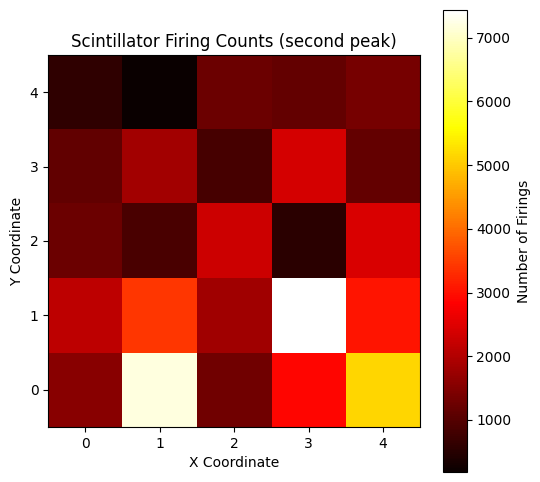

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to count the firings of each scintillator in the time window from 200 ns
def count_firings_per_scintillator(decoded_scints):
    # Initialize a defaultdict to accumulate the firing counts for each scintillator
    # The key will be a tuple representing the (x, y) coordinates of the scintillator
    scintillator_firing_counts = defaultdict(int)

    # Loop through all the events in decoded scintillators
    for event in decoded_scints:
        # Loop through each scintillator in the event
        for scint in event:
            # Only count firings that occurred within the time window 200 to 300 ns
            if 160 <= scint.time <= 300:
                # Increment the count for the scintillator at position (x, y)
                scintillator_firing_counts[(scint.x, scint.y)] += 1

    # Return the dictionary that contains the count of firings for each scintillator
    return scintillator_firing_counts

# Function to plot a 2D array (heatmap) of scintillator firing counts
def plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5)):
    # Create a 2D grid (initially filled with zeros) to represent the scintillator array
    # The size of the grid corresponds to the specified grid_size, 5x5
    firing_grid = np.zeros(grid_size)

    # Populate the grid with the number of firings for each scintillator based on their (x, y) coordinates
    for (x, y), count in scintillator_firing_counts.items():
        # Use the (x, y) coordinates to place the firing count in the grid
        # y corresponds to rows and x to columns
        firing_grid[y, x] = count

    # Plot the heatmap using the populated grid
    plt.figure(figsize=(6, 6))  # Create a figure of size 6x6 inches
    plt.imshow(firing_grid, cmap='hot', interpolation='nearest', origin='lower')  # Create a heatmap using a 'hot' colormap
    plt.colorbar(label='Number of Firings')  # Add a color bar to indicate firing intensity
    plt.title('Scintillator Firing Counts (second peak)')  # Add title
    plt.xlabel('X Coordinate')  # Label for the x-axis
    plt.ylabel('Y Coordinate')  # Label for the y-axis
    plt.show()  # Display the heatmap

# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.151.dat"  # Path to the data file
decoded_scints = process_file(file_path)  # Process the file to decode scintillators

# Count the firings of each scintillator in the time range 0-140 ns (first peak)
scintillator_firing_counts = count_firings_per_scintillator(decoded_scints)

# Plot the heatmap of the number of firings for each scintillator
plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to count the firings of each scintillator in the time window from 0 to 140 ns
def count_firings_per_scintillator(decoded_scints):
    # Initialize a defaultdict to accumulate the firing counts for each scintillator
    # The key will be a tuple representing the (x, y) coordinates of the scintillator
    scintillator_firing_counts = defaultdict(int)

    # Loop through all the events in decoded scintillators
    for event in decoded_scints:
        # Loop through each scintillator in the event
        for scint in event:
            # Only count firings that occurred within the time window 0 to 140 ns
            if 360 <= scint.time <= 450:
                # Increment the count for the scintillator at position (x, y)
                scintillator_firing_counts[(scint.x, scint.y)] += 1

    # Return the dictionary that contains the count of firings for each scintillator
    return scintillator_firing_counts

# Function to plot a 2D array (heatmap) of scintillator firing counts
def plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5)):
    # Create a 2D grid (initially filled with zeros) to represent the scintillator array
    # The size of the grid corresponds to the specified grid_size, typically 5x5
    firing_grid = np.zeros(grid_size)

    # Populate the grid with the number of firings for each scintillator based on their (x, y) coordinates
    for (x, y), count in scintillator_firing_counts.items():
        # Use the (x, y) coordinates to place the firing count in the grid
        # Note that y corresponds to rows and x to columns
        firing_grid[y, x] = count

    # Plot the heatmap using the populated grid
    plt.figure(figsize=(6, 6))  # Create a figure of size 6x6 inches
    plt.imshow(firing_grid, cmap='hot', interpolation='nearest', origin='lower')  # Create a heatmap using a 'hot' colormap
    plt.colorbar(label='Number of Firings')  # Add a color bar to indicate firing intensity
    plt.title('Scintillator Firing Counts (third peak)')  # Add title
    plt.xlabel('X Coordinate')  # Label for the x-axis
    plt.ylabel('Y Coordinate')  # Label for the y-axis
    plt.show()  # Display the heatmap

# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.151.dat"  # Path to the data file
decoded_scints = process_file(file_path)  # Process the file to decode scintillators

# Count the firings of each scintillator in the time range 0-140 ns (first peak)
scintillator_firing_counts = count_firings_per_scintillator(decoded_scints)

# Plot the heatmap of the number of firings for each scintillator
plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5))


NameError: name 'process_file' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Function to count the firings of each scintillator in the time window from 0 to 140 ns
def count_firings_per_scintillator(decoded_scints):
    # Initialize a defaultdict to accumulate the firing counts for each scintillator
    # The key will be a tuple representing the (x, y) coordinates of the scintillator
    scintillator_firing_counts = defaultdict(int)

    # Loop through all the events in decoded scintillators
    for event in decoded_scints:
        # Loop through each scintillator in the event
        for scint in event:
            # Only count firings that occurred within the time window from 600 ns (noise)
            if 600 <= scint.time <= 5110:
                # Increment the count for the scintillator at position (x, y)
                scintillator_firing_counts[(scint.x, scint.y)] += 1

    # Return the dictionary that contains the count of firings for each scintillator
    return scintillator_firing_counts

# Function to plot a 2D array (heatmap) of scintillator firing counts
def plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5)):
    # Create a 2D grid (initially filled with zeros) to represent the scintillator array
    # The size of the grid corresponds to the specified grid_size, typically 5x5
    firing_grid = np.zeros(grid_size)

    # Populate the grid with the number of firings for each scintillator based on their (x, y) coordinates
    for (x, y), count in scintillator_firing_counts.items():
        # Use the (x, y) coordinates to place the firing count in the grid
        # Note that y corresponds to rows and x to columns
        firing_grid[y, x] = count

    # Plot the heatmap using the populated grid
    plt.figure(figsize=(6, 6))  # Create a figure of size 6x6 inches
    plt.imshow(firing_grid, cmap='hot', interpolation='nearest', origin='lower')  # Create a heatmap using a 'hot' colormap
    plt.colorbar(label='Number of Firings')  # Add a color bar to indicate firing intensity
    plt.title('Scintillator Firing Counts (noise)')  # Add title
    plt.xlabel('X Coordinate')  # Label for the x-axis
    plt.ylabel('Y Coordinate')  # Label for the y-axis
    plt.show()  # Display the heatmap

# Example usage
file_path = "/content/drive/MyDrive/Cambridge/data/run.151.dat"  # Path to the data file
decoded_scints = process_file(file_path)  # Process the file to decode scintillators

# Count the firings of each scintillator in the time range 0-140 ns (first peak)
scintillator_firing_counts = count_firings_per_scintillator(decoded_scints)

# Plot the heatmap of the number of firings for each scintillator
plot_scintillator_heatmap(scintillator_firing_counts, grid_size=(5, 5))
